In [24]:
import imageio
import numpy as np
import matplotlib.pyplot as plt

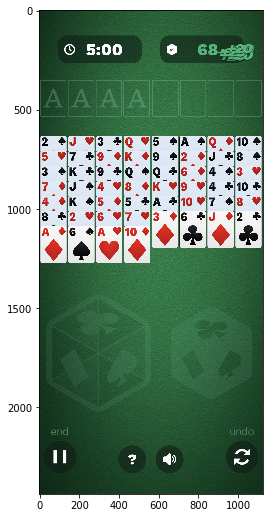

In [214]:
file = imageio.imread('poker.png')

plt.figure(figsize=(4,10))
plt.imshow(file)
plt.show()

In [26]:
def vectorize(x,y):
    """returns a window of pixels"""
    return file[x:x+59, y:y+133]

In [27]:
place_holder = np.array([vectorize(x,y) for x in range(637,1088,75) for y in range(6,987,140)][:-4])

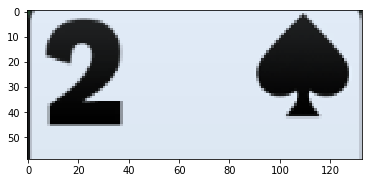

In [215]:
plt.imshow(place_holder[0])
plt.show()

In [29]:
# Label and Save

In [30]:
labels = np.array([['2 Spades'],['Jack Hearts'],['3 Clubs'],['Queen Hearts'],['5 Spades'],['Ace Spades'],['Queen Diamonds'],['10 Spades'],
             ['5 Hearts'],['7 Clubs'],['9 Diamonds'],['King Diamonds'],['9 Spades'],['2 Diamonds'],['Jack Clubs'],['8 Spades'],
             ['3 Spades'],['King Clubs'],['9 Clubs'],['Queen Spades'],['Queen Club'],['6 Diamonds'],['4 Spades'],['3 Hearts'],
             ['7 Diamonds'],['Jack Spades'],['4 Hearts'],['8 Diamonds'],['King Hearts'],['9 Hearts'],['4 Clubs'],['10 Clubs'],
             ['4 Diamonds'],['King Spades'],['5 Diamonds'],['5 Clubs'],['Ace Clubs'],['10 Hearts'],['7 Spades'],['8 Hearts'],
             ['8 Clubs'],['2 Hearts'],['6 Hearts'],['7 Hearts'],['3 Diamonds'],['6 Clubs'],['Jack Diamonds'],['2 Clubs'],
             ['Ace Diamonds'],['6 Spades'],['Ace Hearts'],['10 Diamonds']])

# Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

In [216]:
sample, width, height, color = place_holder.shape

X_flat = place_holder.reshape(sample, width*height*color)

X_flat.shape

(52, 31388)

In [51]:
model = LogisticRegression(multi_class='multinomial',
                           solver='lbfgs',
                           verbose=1,
                           max_iter=3)

model.fit(X_flat, labels)

/home/user/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=3, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=1, warm_start=False)

In [217]:
model.score(X_flat, labels)

0.9230769230769231

In [53]:
model.predict(place_holder[1].reshape(1,-1))

array(['Jack Hearts'], dtype='<U14')

---
## Save the model

In [54]:
import pickle

filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

----
##### a few moments later...
--------

## Load the model and run

In [55]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

True Prediction: ['5 Diamonds']


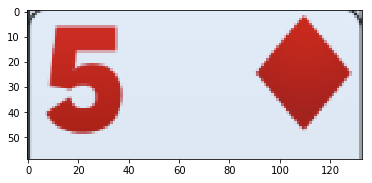

In [167]:
index = 34

result = loaded_model.score(place_holder[index].reshape(1,-1), labels[index])

print(bool(result), 'Prediction:',  loaded_model.predict(place_holder[index].reshape(1,-1)))
      
plt.imshow(place_holder[index])
plt.show()

### All False Prediction

False Prediction: ['10 Diamonds']


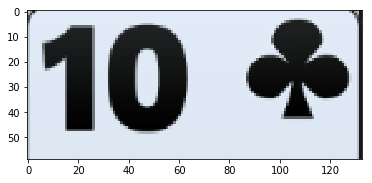

False Prediction: ['6 Clubs']


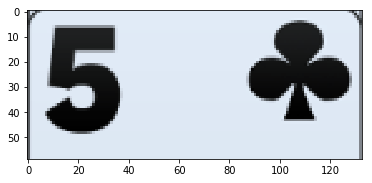

False Prediction: ['10 Diamonds']


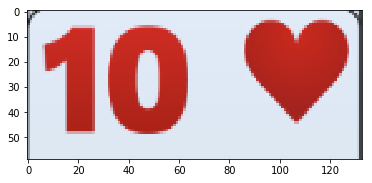

False Prediction: ['6 Clubs']


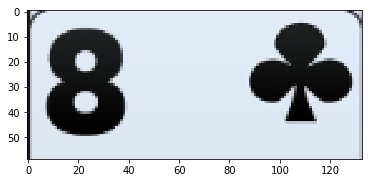

In [168]:
for i in range(0,51):
    r = loaded_model.score((place_holder[i].reshape(1,-1)), labels[i])
    if not r:
        print(bool(r),'Prediction:', loaded_model.predict(place_holder[i].reshape(1,-1)))
        plt.imshow(place_holder[i])
        plt.show()

# Conclusion
* having limited data, we are able to reach 92% accuracy with 3 lbfgs iterations. 
* increasing to 4 achieves 100% which might be overfitting.
* more data is required